In [ ]:
!pip install prophet
import pandas as pd
from google.colab import drive
from prophet import Prophet

drive.mount('/content/gdrive/')
df = pd.read_csv('gdrive/MyDrive/bacasestudy/ADANIPORTS.csv')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
MUNDRAPORT_closing_prices = df[df.values == "MUNDRAPORT"]
MUNDRAPORT_closing_prices = MUNDRAPORT_closing_prices[['Date','Close']]
MUNDRAPORT_closing_prices.columns = ['ds', 'y']
train_ind = int(len(MUNDRAPORT_closing_prices)*0.8)
MUNDRA_train = MUNDRAPORT_closing_prices[:train_ind]
MUNDRA_test = MUNDRAPORT_closing_prices[train_ind:]

# Change column names for Prophet, if not, it will not work
# Prepare the testing data set
# Prepare dates for Prophet for prediction, the column also must called ‘ds’
# Train the model and make prediction, same as SKlearn-style syntax
model = Prophet(changepoint_prior_scale=0.2)
model.fit(MUNDRA_train)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


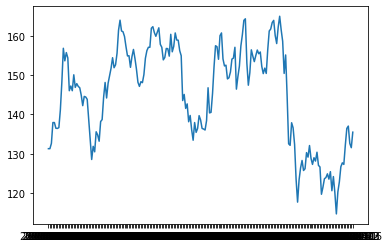

In [ ]:
import matplotlib.pyplot as plt
import datetime
import numpy as np


plt.plot(list(MUNDRA_test['ds']),list(MUNDRA_test['y']))
plt.show()


In [ ]:
MUNDRA_test.tail()


,ds,y
1018,2012-01-10,136.45
1019,2012-01-11,137.05
1020,2012-01-12,132.65
1021,2012-01-13,131.55
1022,2012-01-16,135.50


In [ ]:
MUNDRA_train.head()

,ds,y
0,2007-11-27,962.90
1,2007-11-28,893.90
2,2007-11-29,884.20
3,2007-11-30,921.55
4,2007-12-03,969.30
